In [13]:
from konlpy.tag import Okt
tagger =  Okt()  # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs

In [14]:
#미술관옆동물원시나리오 읽어오기
articles = []
fp = codecs.open("../data/2CJ00052(시나리오샘플국립국어원).txt", "r")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText()
articles = text.split("\n")
len(articles)
fp.close()

In [15]:
articles

['',
 'S 1 결혼식장',
 '비디오 카메라의 뷰-파인더로 보여지는 듯한 화면.',
 '신부:제가 원래 남자 얼굴을 좀 밝혔거든요. 호호호호. 첫눈 에 반했어요.',
 '신랑:비가 와서 걱정했는데 흥행이 성공적이라 정말 기쁩니다.',
 '상투적인 주례사가 흐르면서 결혼식 풍경이 보여지는데, 기존의 결혼식 비디오와는 좀 다른 듯한 신선함이 엿보인다. 생생함, 현장감등을 살리면서 의도적인 핸드-헬드, 퀵-줌 등이 구사되며 양각 구도, 포커스-플레이 등등이 다채롭게 펼쳐지는데…카메라, 하객들을 훑다가 갑자기 느린 화면으로 변한다. 시끌법석한 현장음도 레코드판이 멈추는 것처럼 뭉개지며 사라지고 대신, 촬영하는 사람의 긴장된 숨소리와 심장 박동소리만이 느린 화면에 맞춰서 늘어지게 깔린다. 카메라, 천천히 어느 남자 (보좌관)얼굴에서 멈춘다.',
 '그를 향해 줌-인 되자 뭔가 느끼며 카메라를 흘낏 본다. 계속 그의 표정을 잡고 있자 그가 다시 쳐다보고. 그제서야 카메라는 급히 옆으로 피한다. 그의 시선, 카메라를 따라 오는데, 순간 화면 꺼지고. 경쾌한 음악과 함께 블루 모노-톤 위로 쓰여지는 컬러 제목―미술관 옆 동물원―',
 '음악은 다음 장면들에도 계속 흐른다.',
 'S 2 결혼식장 복도',
 '황급히 걸어나오는 금뱃지의 국회의원(주례선 이)과 보좌관들. 그리고 굽실거리는 신랑신부 부모들. 아까 카메라가 주시하던 사람도 옆에서 걷고 있다. 다들 바쁘게 카메라 앞을 지나친다.',
 'S 인서트',
 '컴퓨터 모니터 화면. 시나리오 같은 게 떠있다.',
 '춘희소리:그는 아직도 내 존재를 모른다.',
 '글자 찍히는 속도가 너무 느리다. 다 치기도 전에 화면 바뀐다.',
 'S 3 결혼식장 복도',
 '다른 날이다. 복장이 바뀐 의원과 보좌관들이 여전히 바삐 걸어 나오고 있다.',
 '의원:그쪽에서 난리 났겠군. 시간 좀 늦추지 그랬나?',
 '보좌관:불가능했습니다, 의원님. 그쪽 사정도 있고 해서… 4시엔 또…',
 '의원:그 4시 껀 거절하지 그랬나?',


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_noun(text):
    nouns = tagger.nouns(text)  #Okt로 명사 추출
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출

In [17]:
#TF-IDF 행렬구하기 
cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)#자주 나타나는 단어 백개만 선택
tdm = cv.fit_transform(articles)

print(tdm.toarray())
print(tdm)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.55102306]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
  (2, 99)	0.5510230612593142
  (2, 91)	0.5016739502055895
  (2, 38)	0.6668559317015434
  (3, 57)	0.6522344700584954
  (3, 11)	0.7580172795309574
  (4, 79)	1.0
  (5, 35)	0.24784594713352723
  (5, 45)	0.1681509950865937
  (5, 39)	0.2066219022307628
  (5, 86)	0.2989474416789589
  (5, 0)	0.2845580070340871
  (5, 13)	0.264277237974777
  (5, 57)	0.2324660141623376
  (5, 11)	0.2701685723892154
  (5, 99)	0.47745298140412223
  (5, 91)	0.4346927380335536
  (5, 38)	0.2889101882871002
  (6, 19)	0.2354421857301693
  (6, 30)	0.2354421857301693
  (6, 65)	0.25615475

In [18]:
import numpy
import operator
words = cv.get_feature_names()
count_mat = tdm.sum(axis=0)
count = numpy.squeeze(numpy.asarray(count_mat))  #np.sqeeze() 차원을 줄여주는 함수
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)  
word_count

hot_key = list(dict(word_count[:50]).keys())  #최빈도 단어 50개
hot_key

['춘희',
 '철수',
 '다혜',
 '소리',
 '인공',
 '사람',
 '카메라',
 '생각',
 '다시',
 '미술관',
 '사랑',
 '동물원',
 '얼굴',
 '지금',
 '화면',
 '시간',
 '보좌',
 '계속',
 '결혼',
 '시나리오',
 '보고',
 '여자',
 '무슨',
 '정말',
 '전화',
 '아줌마',
 '침대',
 '그냥',
 '하나',
 '표정',
 '그녀',
 '그게',
 '자기',
 '그림',
 '여기',
 '우리',
 '자전거',
 '음악',
 '분위기',
 '우산',
 '다혜씨',
 '친구',
 '모습',
 '마음',
 '뭔가',
 '위로',
 '타고',
 '다른',
 '서로',
 '한번']

In [23]:
dict(word_count[:50])

{'춘희': 322.10726047709113,
 '철수': 275.5971188020132,
 '다혜': 82.99521504386773,
 '소리': 70.99923844130892,
 '인공': 54.95277565124402,
 '사람': 32.42804972759589,
 '카메라': 24.0259087515926,
 '생각': 22.767788016775896,
 '다시': 22.036680531923388,
 '미술관': 21.724300554290235,
 '사랑': 19.438594250251345,
 '동물원': 18.916394512177412,
 '얼굴': 17.108477471633854,
 '지금': 16.302434637025936,
 '화면': 15.612257792849842,
 '시간': 15.599543308961724,
 '보좌': 15.41345863950559,
 '계속': 15.311742650867538,
 '결혼': 14.740196790912423,
 '시나리오': 14.317664860360592,
 '보고': 14.156982954244667,
 '여자': 14.037893751457007,
 '무슨': 13.370445875580549,
 '정말': 13.0300187032432,
 '전화': 12.873928815612613,
 '아줌마': 12.855077052642256,
 '침대': 12.757744320023086,
 '그냥': 12.541415792965312,
 '하나': 12.513756964617569,
 '표정': 12.351267832915912,
 '그녀': 12.221878341138453,
 '그게': 12.176511981578301,
 '자기': 11.231966243113195,
 '그림': 10.778194937499114,
 '여기': 10.72556485185072,
 '우리': 10.597123792730823,
 '자전거': 10.451331482456055,
 '음악'

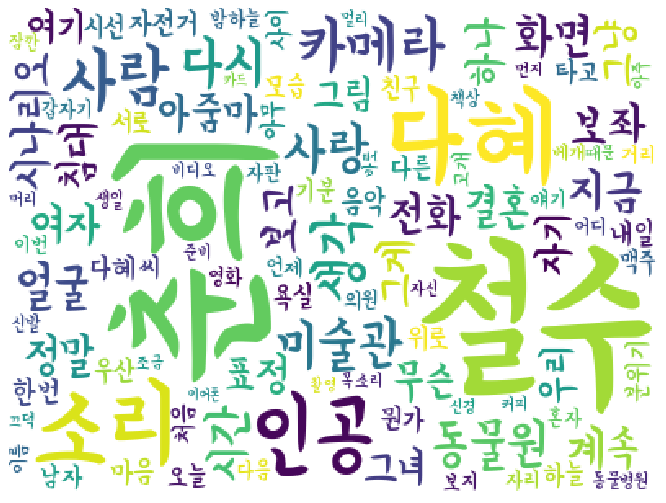

In [20]:
#word cloud
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\BMYEONSUNG_ttf.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [21]:
import codecs
from konlpy.tag import Okt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

In [22]:
# 텍스트를 처리하기
okt = Okt()
results = []
lines = articles
words_all = []

for line in lines:
    # 형태소 분석하기
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 명사/동사/부사만 걸러내기 
        if word[1] in ['Noun','Verb','Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    #print(rl)

In [24]:
# 파일로 저장하기
from gensim.models import word2vec
yang_file = 'yang.model'
with open(yang_file, 'w', encoding='utf-8') as fp2:
    fp2.write("\n".join(results))
    
fp2.close()

In [25]:
# Word2Vec 모델
data = word2vec.LineSentence(yang_file)
model = word2vec.Word2Vec(data,size=200, window=10, hs=1, min_count=2, sg=1) 
model.save("yang_w2v.model")

#size=200 200차원의 벡터
#window=10 좌우 10개 단어 보기, 
#min_count=2  출현빈도 2
#sg = 1 skip gram 사용
#hs = 1 Huffman Tree를 이용한 Hierachical Softmax

C:\Users\a\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [30]:
################ 테스트 #######
model.most_similar(positive=["춘희"])

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('높이', 0.9986390471458435),
 ('내쉬다', 0.9985953569412231),
 ('깨끗하다', 0.9985299110412598),
 ('목', 0.9985257387161255),
 ('이번', 0.9985086917877197),
 ('탁자', 0.99849534034729),
 ('테입', 0.9984389543533325),
 ('기왕', 0.9983865022659302),
 ('귀', 0.9983478784561157),
 ('퇴근길', 0.9983359575271606)]

In [27]:
model.most_similar(positive=["철수"])

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('아내', 0.9978841543197632),
 ('갈등', 0.9973553419113159),
 ('편하다', 0.9972207546234131),
 ('갈다', 0.9972144365310669),
 ('혹시', 0.9971813559532166),
 ('발끝', 0.9969186782836914),
 ('당첨', 0.9969005584716797),
 ('집다', 0.9968277215957642),
 ('쪽지', 0.9968157410621643),
 ('심호흡', 0.996788501739502)]

In [28]:
model["결혼"]

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.02105131, -0.07124077, -0.11951397, -0.07285848,  0.03419197,
       -0.00256179,  0.03949323, -0.02922814, -0.08098941, -0.02361761,
        0.13423032,  0.00369009, -0.03581975,  0.05588055, -0.01062147,
       -0.1289415 , -0.04380515, -0.07355887,  0.07506847, -0.06288078,
       -0.08860367,  0.05689735,  0.03831651, -0.12450518,  0.15351382,
       -0.06180814,  0.09646128, -0.03521303, -0.11240042, -0.09651122,
        0.00536341, -0.01885982, -0.00364379,  0.10450642, -0.14161879,
       -0.02937371, -0.00999303, -0.00612265,  0.13286369,  0.06727891,
       -0.00759634,  0.17784329, -0.0905691 ,  0.11857908, -0.02088794,
        0.04240288, -0.07117172,  0.00368836,  0.12490962,  0.09203542,
       -0.05890812,  0.02382188,  0.00951373,  0.02145969, -0.0049876 ,
       -0.0277032 , -0.06670757,  0.0807936 , -0.12655738,  0.12060073,
        0.00604116,  0.0273586 ,  0.01217992, -0.03693675, -0.01102736,
        0.03132103, -0.1485274 , -0.04021821,  0.26210758,  0.08

In [29]:
model["사람"]

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.49658488e-02, -6.81304038e-02, -1.70567855e-01, -4.16647121e-02,
        5.14729097e-02, -8.53155646e-03,  7.53604919e-02, -5.53620979e-02,
       -8.46116021e-02, -6.07455187e-02,  1.43527657e-01,  4.19219807e-02,
       -1.26035856e-02,  7.14135915e-02,  3.27784452e-03, -1.11715533e-01,
       -2.81174481e-02, -9.51903164e-02,  6.05268255e-02, -2.26903684e-03,
       -8.79306942e-02,  6.58996478e-02,  4.53329161e-02, -1.16534255e-01,
        1.66280463e-01, -6.46817163e-02,  1.52626514e-01, -8.19825288e-03,
       -1.19125627e-01, -5.87698966e-02,  3.49921826e-03, -2.16292199e-02,
       -9.83908493e-03,  1.20602906e-01, -1.60037696e-01, -4.16156277e-02,
       -9.90273617e-03,  8.79138801e-03,  1.77169845e-01,  9.17123929e-02,
       -1.77579634e-02,  1.66991293e-01, -1.06954619e-01,  1.56968758e-01,
       -1.91524960e-02,  4.42707390e-02, -2.18045767e-02, -1.24119809e-02,
        1.75022811e-01,  6.12482354e-02, -4.91470844e-02, -1.25538954e-03,
        4.47912365e-02, -

In [31]:
model.most_similar(positive=["미술관","여자"] , negative=["여자"]) #'여자' 단어 제거후 가장 비슷한 단어 찾기

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('구경', 0.9970951676368713),
 ('이정표', 0.9970208406448364),
 ('주택', 0.9969915151596069),
 ('진열', 0.9960495233535767),
 ('캔', 0.9959560632705688),
 ('의아', 0.9958924651145935),
 ('하얗다', 0.9957064390182495),
 ('린다', 0.9954907894134521),
 ('휴지', 0.9954679012298584),
 ('순간', 0.9954072833061218)]

In [32]:
from IPython.display import Image
from sklearn.decomposition import PCA

#차원을 줄여주기(그래프를 그려주기 위함) 
words = list(model.wv.vocab)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

result2 = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.3, min_samples=10).fit(result2)
labels = db.labels_

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [33]:
import collections
import math
import numpy as np 

myCounter = collections.Counter(words_all)
#print('myCounter:', myCounter)

radiuds = np.array([i for i in list(myCounter.values())])
area = np.pi * (radiuds)**2  
table_words = list(myCounter.keys()) 
table_counts = list(list(myCounter.values()))

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm 

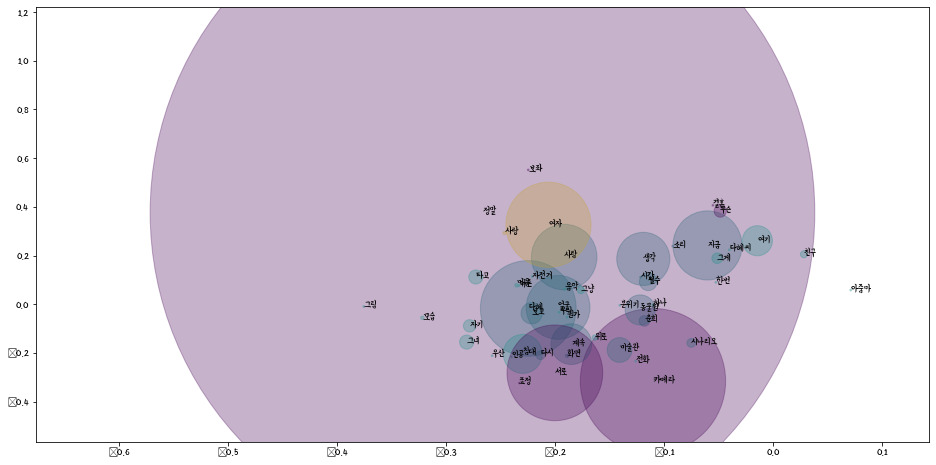

In [36]:
#top50의 단어를 선별하여 word2vec을 계산하고 좌표로 찍어준다. 
font_location = "C:\\Windows\\Fonts\\BMYEONSUNG_ttf.TTF"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

valid_words = [hot_key[i] for i in range(0,50) if hot_key[i] in words]  #최빈도 50개 단어 추출
valid_index = [words.index(str_temp) for str_temp in valid_words]   
valid_labels = [labels[i]+1 for i in valid_index]
valid_area = area[[table_words.index(str_temp) for str_temp in valid_words]]   #단어 빈도에 비례해서 원이 커지도록 설정
zip_index = zip(valid_index,valid_words)

plt.figure(figsize=(16, 8))
plt.scatter(result[valid_index, 0], result[valid_index, 1] , c = valid_labels , s = area , alpha=0.3)
for i, word in zip_index:
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

In [37]:
#캐릭터 관계테스트 
model.similarity('춘희', '철수')

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.9883593

In [38]:
model.similarity('춘희', '인공')

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.96366686

In [39]:
print(model.most_similar(positive=["인공"], topn=100))

[('빠지다', 0.9966691136360168), ('지나치다', 0.9890199899673462), ('카메라', 0.9874882698059082), ('하자', 0.9845213890075684), ('깔리다', 0.981658935546875), ('길', 0.9815619587898254), ('표정', 0.9812687635421753), ('혼자', 0.980918288230896), ('계속', 0.9808922410011292), ('다혜', 0.9806952476501465), ('점점', 0.9806442260742188), ('기쁘다', 0.9804907441139221), ('둘', 0.9800856113433838), ('바로', 0.9797623753547668), ('훔치다', 0.9794989824295044), ('옆', 0.979488730430603), ('미술관', 0.9793722629547119), ('몰다', 0.9792717695236206), ('쭈욱', 0.9790549874305725), ('구석', 0.9789970517158508), ('그녀', 0.9789890050888062), ('떠나다', 0.9787150025367737), ('구경', 0.9784142971038818), ('싸우다', 0.9783973693847656), ('잡다', 0.9779268503189087), ('전화', 0.9777862429618835), ('순간', 0.9777845740318298), ('얼굴', 0.9777425527572632), ('망원경', 0.9777225255966187), ('향', 0.9776417016983032), ('이정표', 0.9775937795639038), ('관찰', 0.9775547981262207), ('차', 0.9772156476974487), ('뒷모습', 0.9769995212554932), ('쳐다보다', 0.976803719997406), ('뭔가', 0.9764

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
